In [1]:
import sys
sys.path.insert(0,'./..')
sys.path.insert(0,'./../lib')

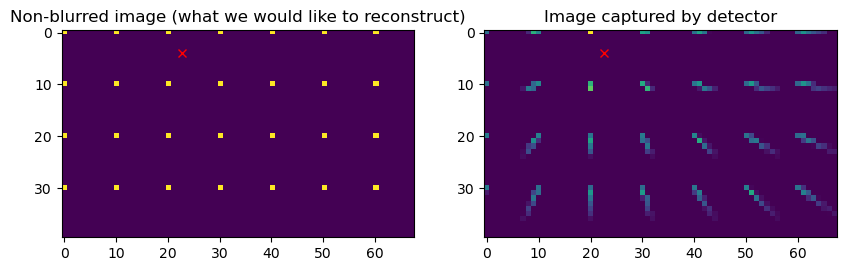

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import examplesetup
import lib.deconvolution as deconvolution
import lib.utils as utils
import lib.xtrace as xtrace

#Square detector, 100x100 pixels
detector_size = (40, 68)

#PSF generation parameters
config = {
    "detector": {
         #pixel dimensions
        "pixel_dims": np.array([1.0, 1.0, 3.0]),
        #energy absorbtion rate of detector material:
        "mu":  0.3
    },
    #detector dimensions:
    "dimensions": np.array(detector_size), 
    #ray origin position relative to upper left corner of detector:
    "ray_origin": np.array([detector_size[0]/10, detector_size[1]/3, np.mean(detector_size)/4]), 
}

#grid of rays that will hit the detector for estimating PSF
ray_grid = utils.ray_grid(config["dimensions"])
#sparse matrix encoding the spatially variant PSF
G = xtrace.depth_spill_psf(config, *ray_grid)

#construct example image
img = np.zeros(config["dimensions"])
img[70:80,50:60] = 1
img[10:20, 70:80] = 1
img[::10,::10] = 1

#Apply the point spread function to our image
distorted_img = (G.get()@img.flatten()).reshape(img.shape)

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title("Non-blurred image (what we would like to reconstruct)")
axs[0].plot(*config["ray_origin"][:2][::-1], 'rx')
axs[1].imshow(distorted_img)
axs[1].set_title("Image captured by detector")
axs[1].plot(*config["ray_origin"][:2][::-1], 'rx')
plt.show()

In [3]:
config

{'detector': {'pixel_dims': array([1., 1., 3.]), 'mu': 0.3},
 'dimensions': array([40, 68]),
 'ray_origin': array([ 4.        , 22.66666667, 13.5       ])}